In [1]:
import skimage
skimage.__version__

'0.17.2'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import imageio as io
import matplotlib.colors as colors
import pywt
from skimage import metrics

In [3]:
import requests
from PIL import Image
from io import BytesIO

img_urls = ['https://cims.nyu.edu/~cfgranda/foto.jpg']

img_array = []
for url in img_urls:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.convert('L')
    img = img.resize((512, 512))
    img = np.array(img)
    img_array.append(img)

In [4]:
def visualize_image_and_recon(image, recon_image, figsize = (10, 5)):
    
    fig, axes = plt.subplots(nrows=1, ncols=2,  figsize = figsize)
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    
    axes[1].imshow(recon_image, cmap='gray')
    axes[1].set_title(f"Reconstructed. PSNR: {metrics.peak_signal_noise_ratio(image, recon_image, data_range = 255.): .3f}")
    
    plt.show()

In [5]:
image = np.array(img_array[0])

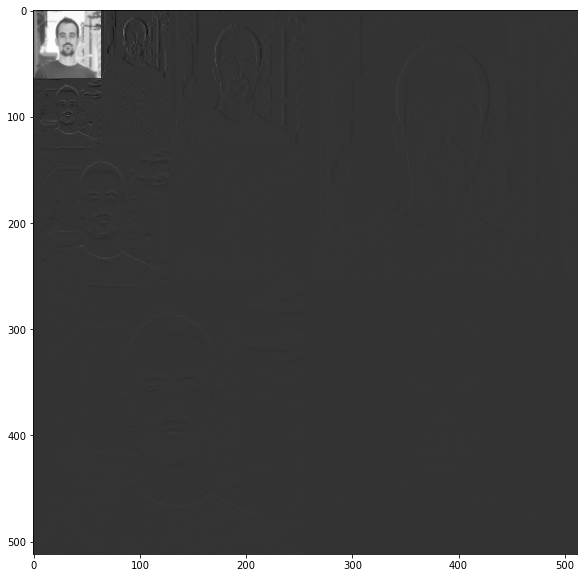

In [6]:
n_levels = 3
wav_type = 'haar'
wav_type = 'haar'
x_w = pywt.wavedec2(image, wav_type, level=n_levels) 
coeff_array, coeff_slices = pywt.coeffs_to_array(x_w) 
plt.figure(figsize = (10, 10)) 
plt.imshow(coeff_array, cmap='gray')

In [7]:
image.ndim

2

### Visualizing wavelet coeffs

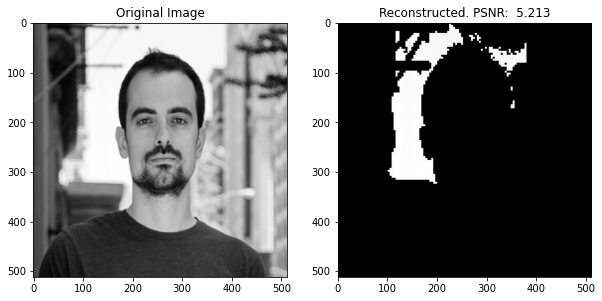

percent kept:0.005 Number of levels:2


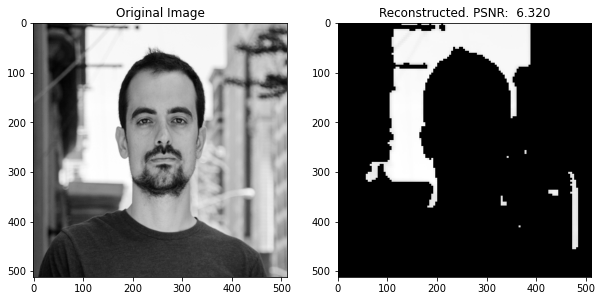

percent kept:0.01 Number of levels:2


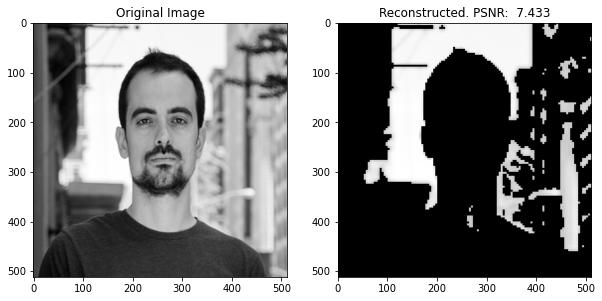

percent kept:0.015 Number of levels:2


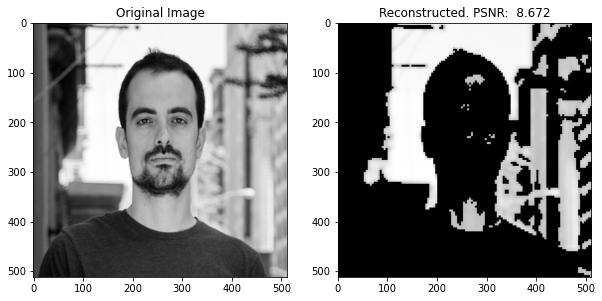

percent kept:0.02 Number of levels:2


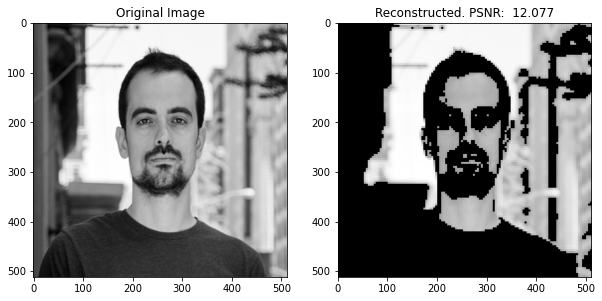

percent kept:0.03 Number of levels:2


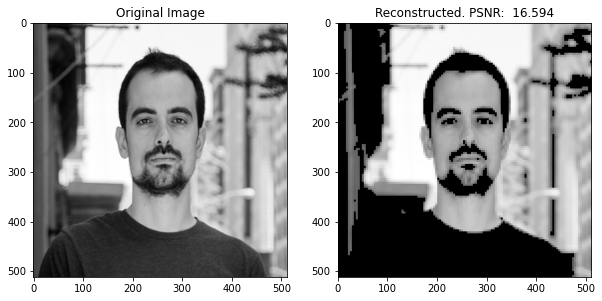

percent kept:0.04 Number of levels:2


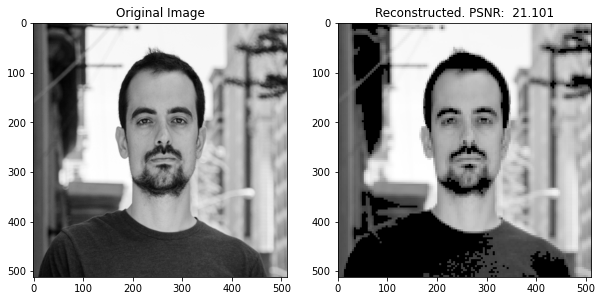

percent kept:0.05 Number of levels:2


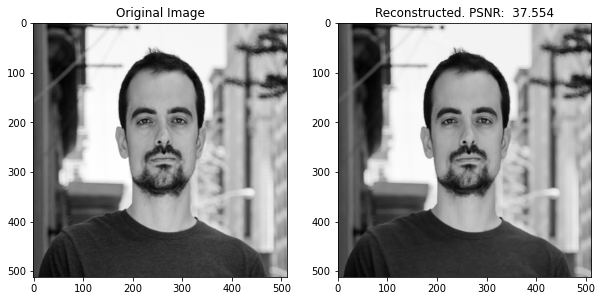

percent kept:0.1 Number of levels:2


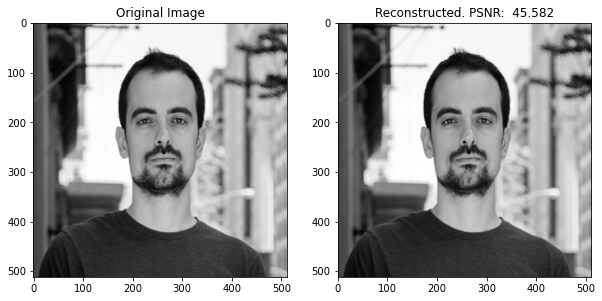

percent kept:0.25 Number of levels:2


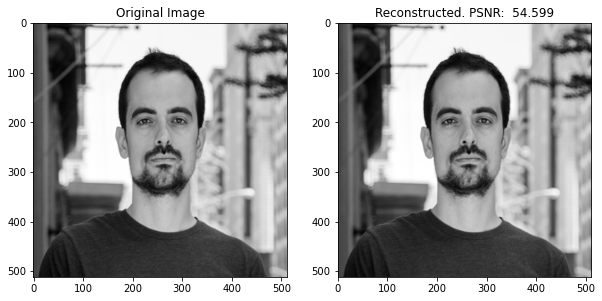

percent kept:0.5 Number of levels:2


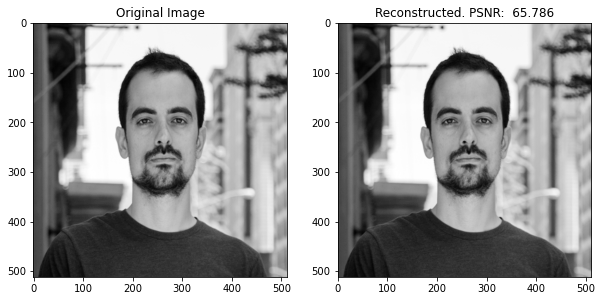

percent kept:0.75 Number of levels:2


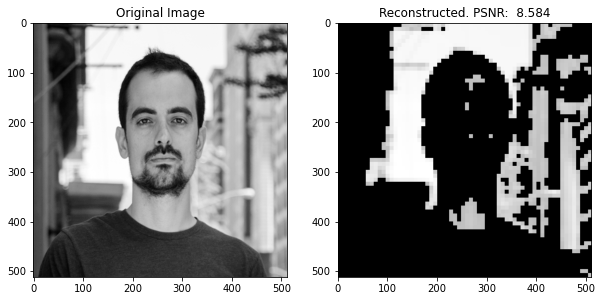

percent kept:0.005 Number of levels:3


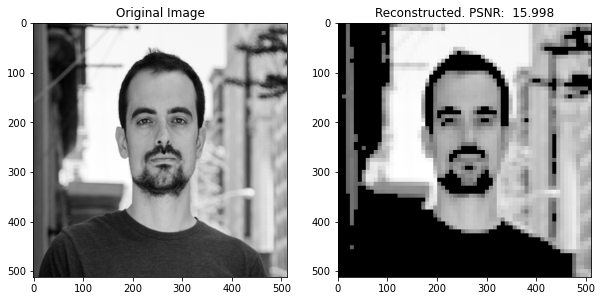

percent kept:0.01 Number of levels:3


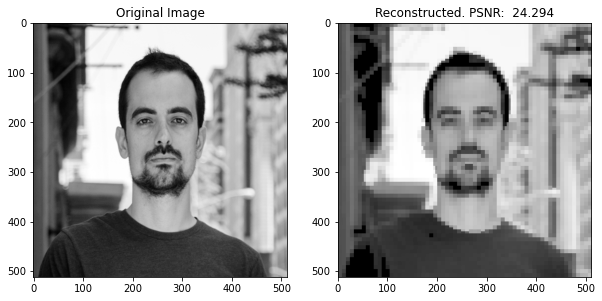

percent kept:0.015 Number of levels:3


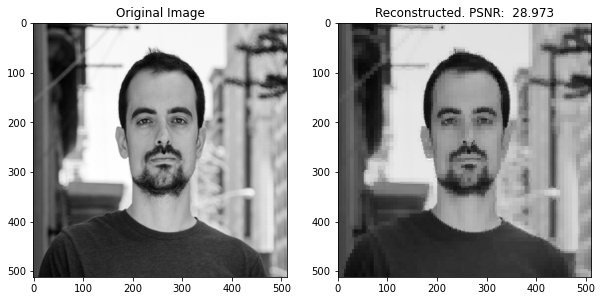

percent kept:0.02 Number of levels:3


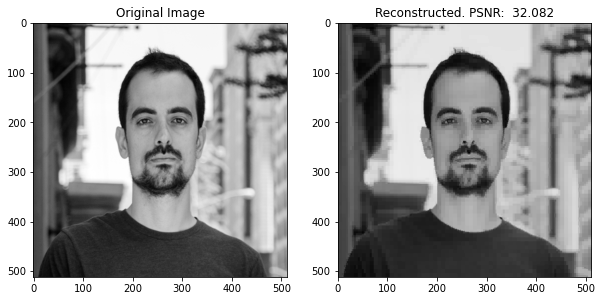

percent kept:0.03 Number of levels:3


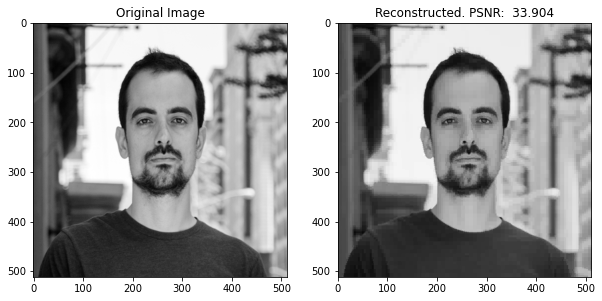

percent kept:0.04 Number of levels:3


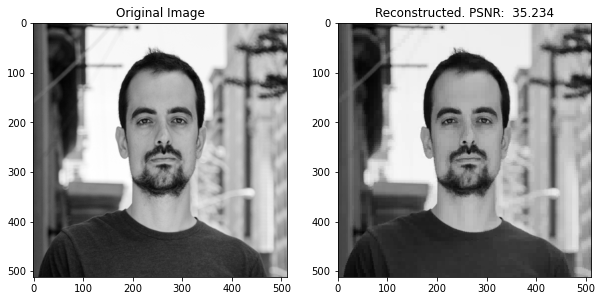

percent kept:0.05 Number of levels:3


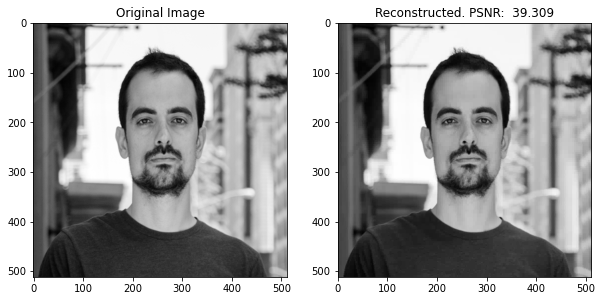

percent kept:0.1 Number of levels:3


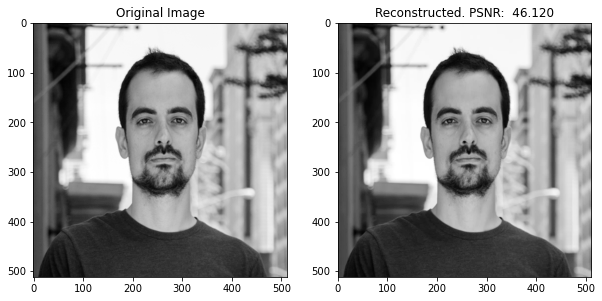

percent kept:0.25 Number of levels:3


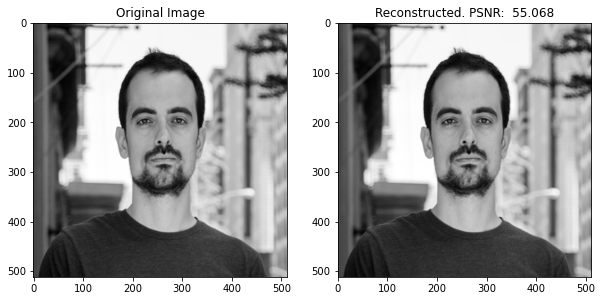

percent kept:0.5 Number of levels:3


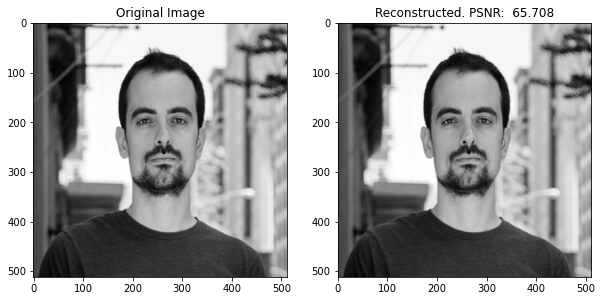

percent kept:0.75 Number of levels:3


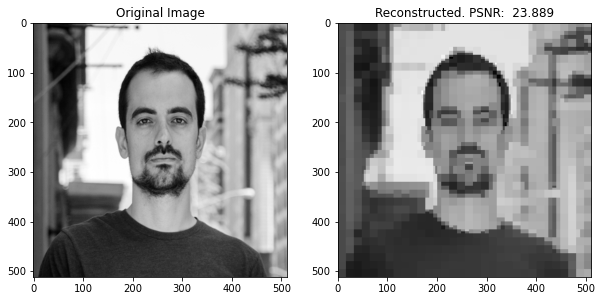

percent kept:0.005 Number of levels:4


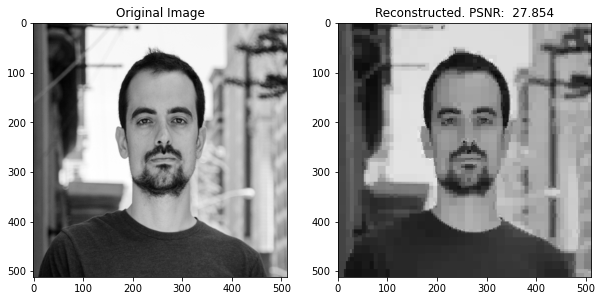

percent kept:0.01 Number of levels:4


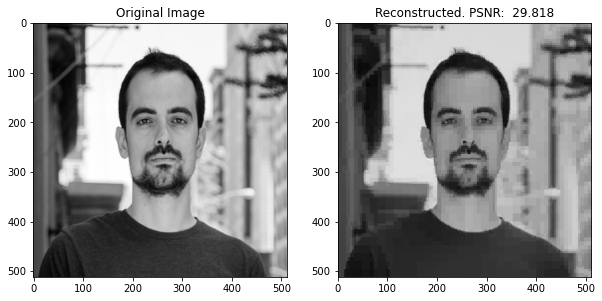

percent kept:0.015 Number of levels:4


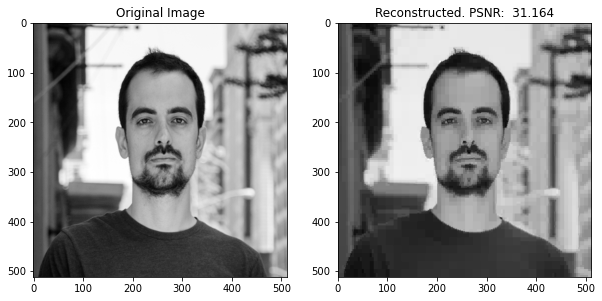

percent kept:0.02 Number of levels:4


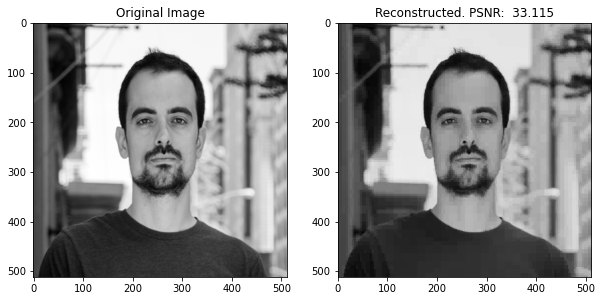

percent kept:0.03 Number of levels:4


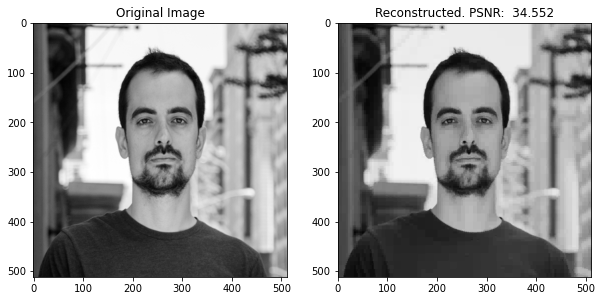

percent kept:0.04 Number of levels:4


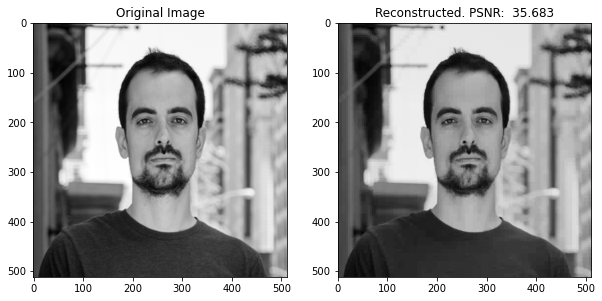

percent kept:0.05 Number of levels:4


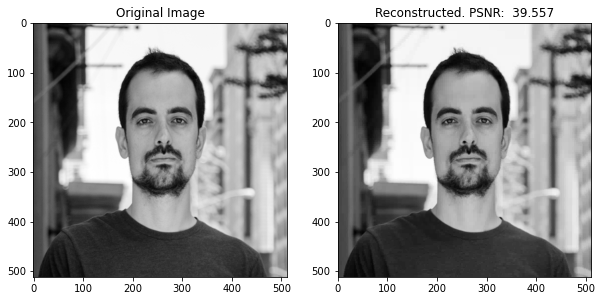

percent kept:0.1 Number of levels:4


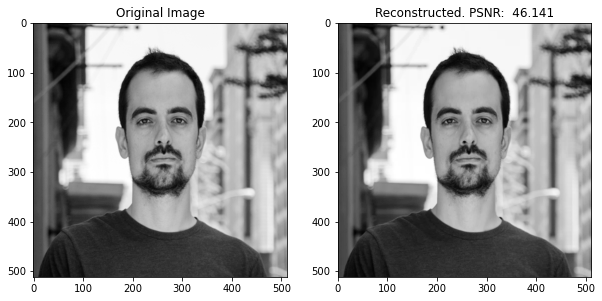

percent kept:0.25 Number of levels:4


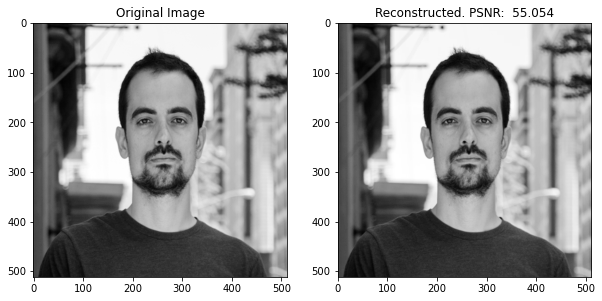

percent kept:0.5 Number of levels:4


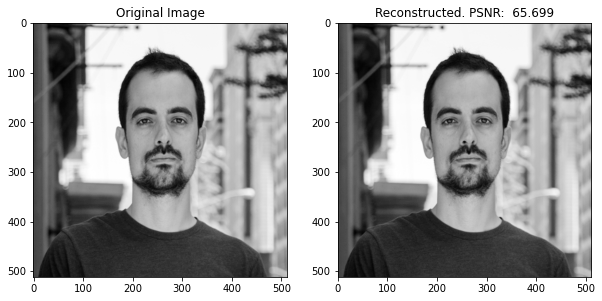

percent kept:0.75 Number of levels:4


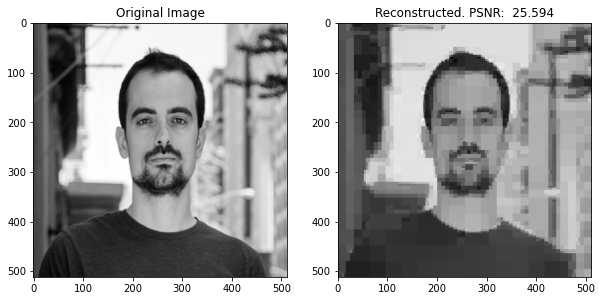

percent kept:0.005 Number of levels:5


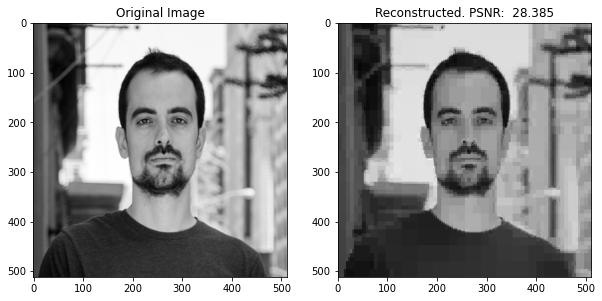

percent kept:0.01 Number of levels:5


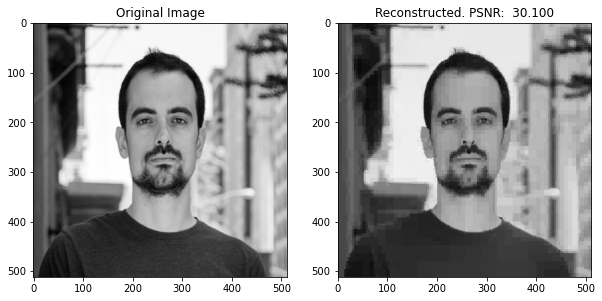

percent kept:0.015 Number of levels:5


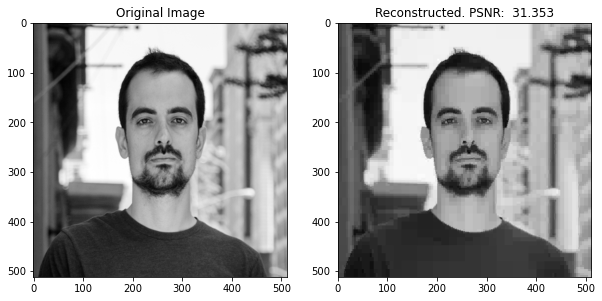

percent kept:0.02 Number of levels:5


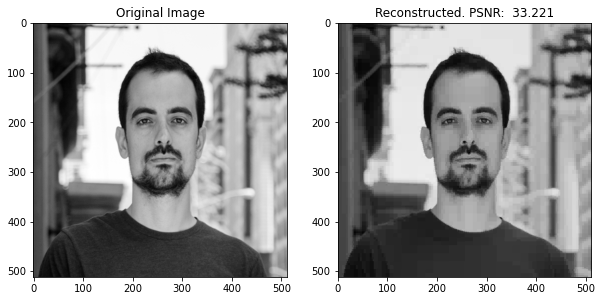

percent kept:0.03 Number of levels:5


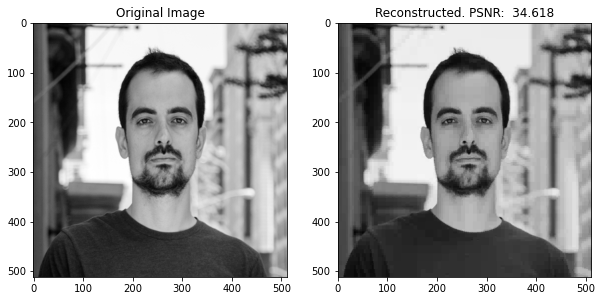

percent kept:0.04 Number of levels:5


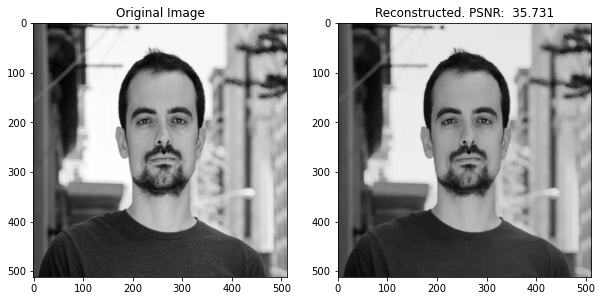

percent kept:0.05 Number of levels:5


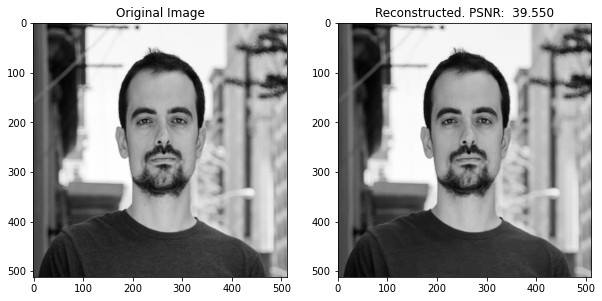

percent kept:0.1 Number of levels:5


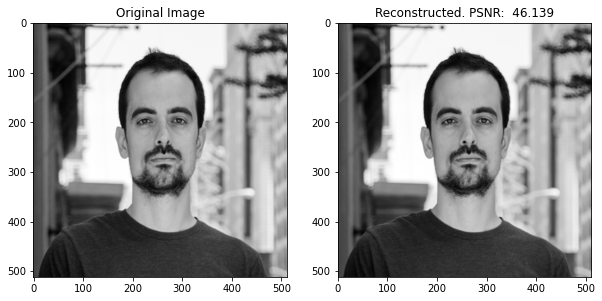

percent kept:0.25 Number of levels:5


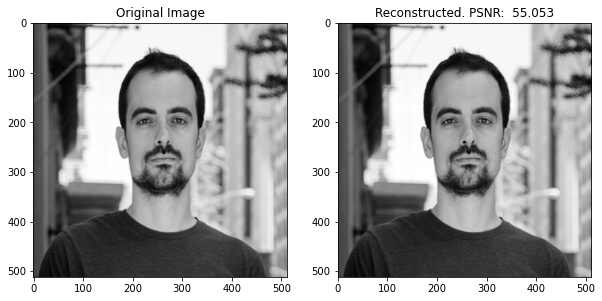

percent kept:0.5 Number of levels:5


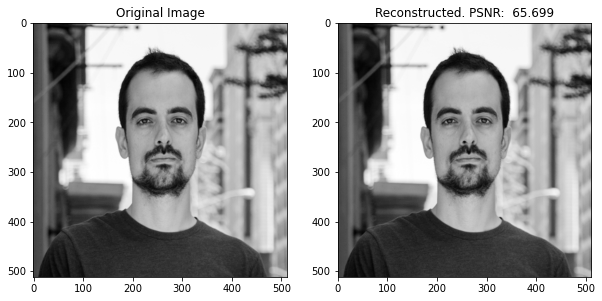

percent kept:0.75 Number of levels:5


In [8]:
n_levels = [2, 3, 4, 5]
pct = [0.5, 1, 1.5, 2, 3, 4, 5, 10, 25, 50, 75] 
titles=[]
wav_type = 'haar'
PSNR = []
n=0
for i in range(len(n_levels)): 
    temp = []
    for j in range(len(pct)):
        x_w = pywt.wavedec2(image, wav_type, level=n_levels[i]) 
        coeff_array, coeff_slices = pywt.coeffs_to_array(x_w)
        x = sorted(np.abs(coeff_array.flatten()), reverse=True) 
        threshold = int(np.ceil(len(x)*(pct[j]/100)))
        for r in range(len(coeff_array)):
            for s in range(len(coeff_array[0])):
                if np.abs(coeff_array[r][s]) < x[threshold]:
                    coeff_array[r][s] = 0
        coeff_correctformat = pywt.array_to_coeffs(coeff_array, coeff_slices,output_format='wavedec2')
        recon_image = pywt.waverec2(coeff_correctformat, wavelet=wav_type) 
        visualize_image_and_recon(image, recon_image) 
        temp.append(metrics.peak_signal_noise_ratio(image, recon_image,data_range = 255.)) 
        titles.append('percent kept:' +str(pct[j]/100)+' Number of levels:'+str(n_levels[i]))
        
        PSNR.append(temp)
        
        print(titles[n])
        n+=1
        

### Reconstructing the image

In [26]:
coeff_correctformat = pywt.array_to_coeffs(coeff_array, coeff_slices, output_format='wavedec2')

In [27]:
recon_image = pywt.waverec2(coeff_correctformat, wavelet=wav_type)

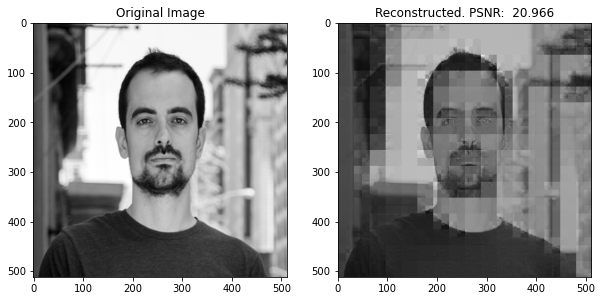

In [28]:
visualize_image_and_recon(image, recon_image)

(b) Plot the PSNR of reconstructed image with respect to the clean image for different threshold values. Include different levels of decomposition as different curve in the same graph.

In [10]:
len(PSNR)

44

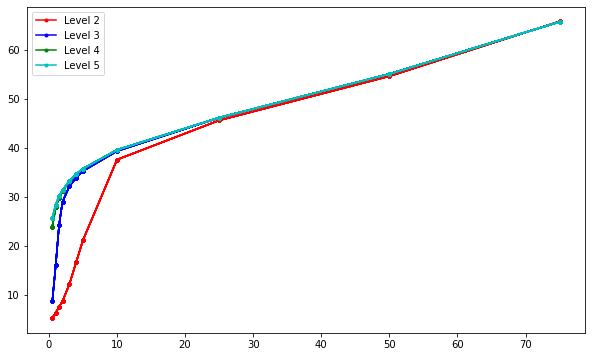

In [63]:
fig, ax = plt.subplots(figsize=(10, 6)) 
for i in range(len(PSNR)):
    if i in range(11):
        ax.plot(pct, PSNR[i], '.r-',label="Level 2"if i == 0 else "")
    elif i in range(11,22):
        ax.plot(pct, PSNR[i], '.b-',label="Level 3"if i == 11 else "")
    elif i in range(22,33):
        ax.plot(pct, PSNR[i], '.g-',label="Level 4"if i == 22 else "")
    elif i in range(33,44):
        ax.plot(pct, PSNR[i], '.c-',label="Level 5"if i == 33 else "")
        
ax.legend()